# `BUILDING A ML MODEL TO PREDICT SEPSIS IN PATIENTS` 
#### Using the CRISP-DM framework

## `Business Understanding`


#### Goal/Description
To create a machine learning model to predict the sepsis in a patient


#### `Null Hypothesis`
There is no relationship between a tech savvy customer and the customer retention

#### `Alternate Hypothesis`
There is a relationship between a tech savvy customer and the customer retention

### `Key Metrics and Success Criteria`

The success of this poject will be evaluated based on several key metrics and success criteria including;

• Model Accuracy : The ability of the machine learning model to accurately predict customer churn.

• Model Interpretability : The degree to which the model's predictions and insights can be understood and utilized by stakeholders.

• Business Impact : The effectiveness of retention strategies implemented based on the model's recommendations in reducing customer churn rates and improving overall customer satisfaction and retention.




#### `Analytical Questions`
- Are older patients more likely to have sepsis?
- Are older patients with low plasma glucose likely to have sepsis?
- Is Obesity a risk factor for sepsis?
- Is there a relation between bloodwork and sepsis?
- Are patients with insurance more likely to detect sepsis?

## `Data Understanding`


#### Data Source
The data was sourced from The Johns Hopkins University

### `Issues`
- No issues 


#### Data Exploration

##### `Libraries`

In [1]:

#Libraries imported
import pandas as pd
from scipy import stats 
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import collections
import numpy as np

#Filter warnings
import warnings
warnings.filterwarnings('ignore')



from sklearn.model_selection import * #train_test_split, cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from catboost import CatBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier

#for balancing dataset
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

#for feature selection
from sklearn.feature_selection import mutual_info_classif,SelectKBest

#Crossvalidation for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

#joblib for model persit
import joblib

from sklearn.metrics import *
from sklearn.model_selection import * 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


##### `Accessing train data in CSV`

In [3]:

##Accessing train data
df = pd.read_csv("data\Paitients_Files_Train.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [4]:

# Describing the Dataframe
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,599,599,ICU200010,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRG,599.0,NaN,NaN,NaN,3.824708,3.362839,0.0,1.0,3.0,6.0,17.0
PL,599.0,NaN,NaN,NaN,120.153589,32.682364,0.0,99.0,116.0,140.0,198.0
PR,599.0,NaN,NaN,NaN,68.732888,19.335675,0.0,64.0,70.0,80.0,122.0
SK,599.0,NaN,NaN,NaN,20.562604,16.017622,0.0,0.0,23.0,32.0,99.0
TS,599.0,NaN,NaN,NaN,79.460768,116.576176,0.0,0.0,36.0,123.5,846.0
M11,599.0,NaN,NaN,NaN,31.920033,8.008227,0.0,27.1,32.0,36.55,67.1
BD2,599.0,NaN,NaN,NaN,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,NaN,NaN,NaN,33.290484,11.828446,21.0,24.0,29.0,40.0,81.0
Insurance,599.0,NaN,NaN,NaN,0.686144,0.464447,0.0,0.0,1.0,1.0,1.0


##### General Observation
- There are 599 patients data for the ML model
- About 65% of the patients are Sepsis Negative showing a general imbalance

In [ ]:
# ##### Converting the TotalCharges datatype to float64

# #Converting TotalCharges column to numeric
# com_df['TotalCharges'] = pd.to_numeric(com_df['TotalCharges'], errors='coerce')
# com_df=com_df.reset_index()


In [5]:

# Checking the Null value
df.isnull().sum()


ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

#### Observation
There are no missing values in the dataset

### Univariate Analysis

In [6]:
data=df.copy()

In [7]:
#Dropping the patient ID column
data.drop(['ID'], axis = 1 ,inplace=True)

In [9]:
# Replacing all negatives with False and positives with True
data['Sepssis'] = np.where(data['Sepssis'] == "Positive", 1, 0)

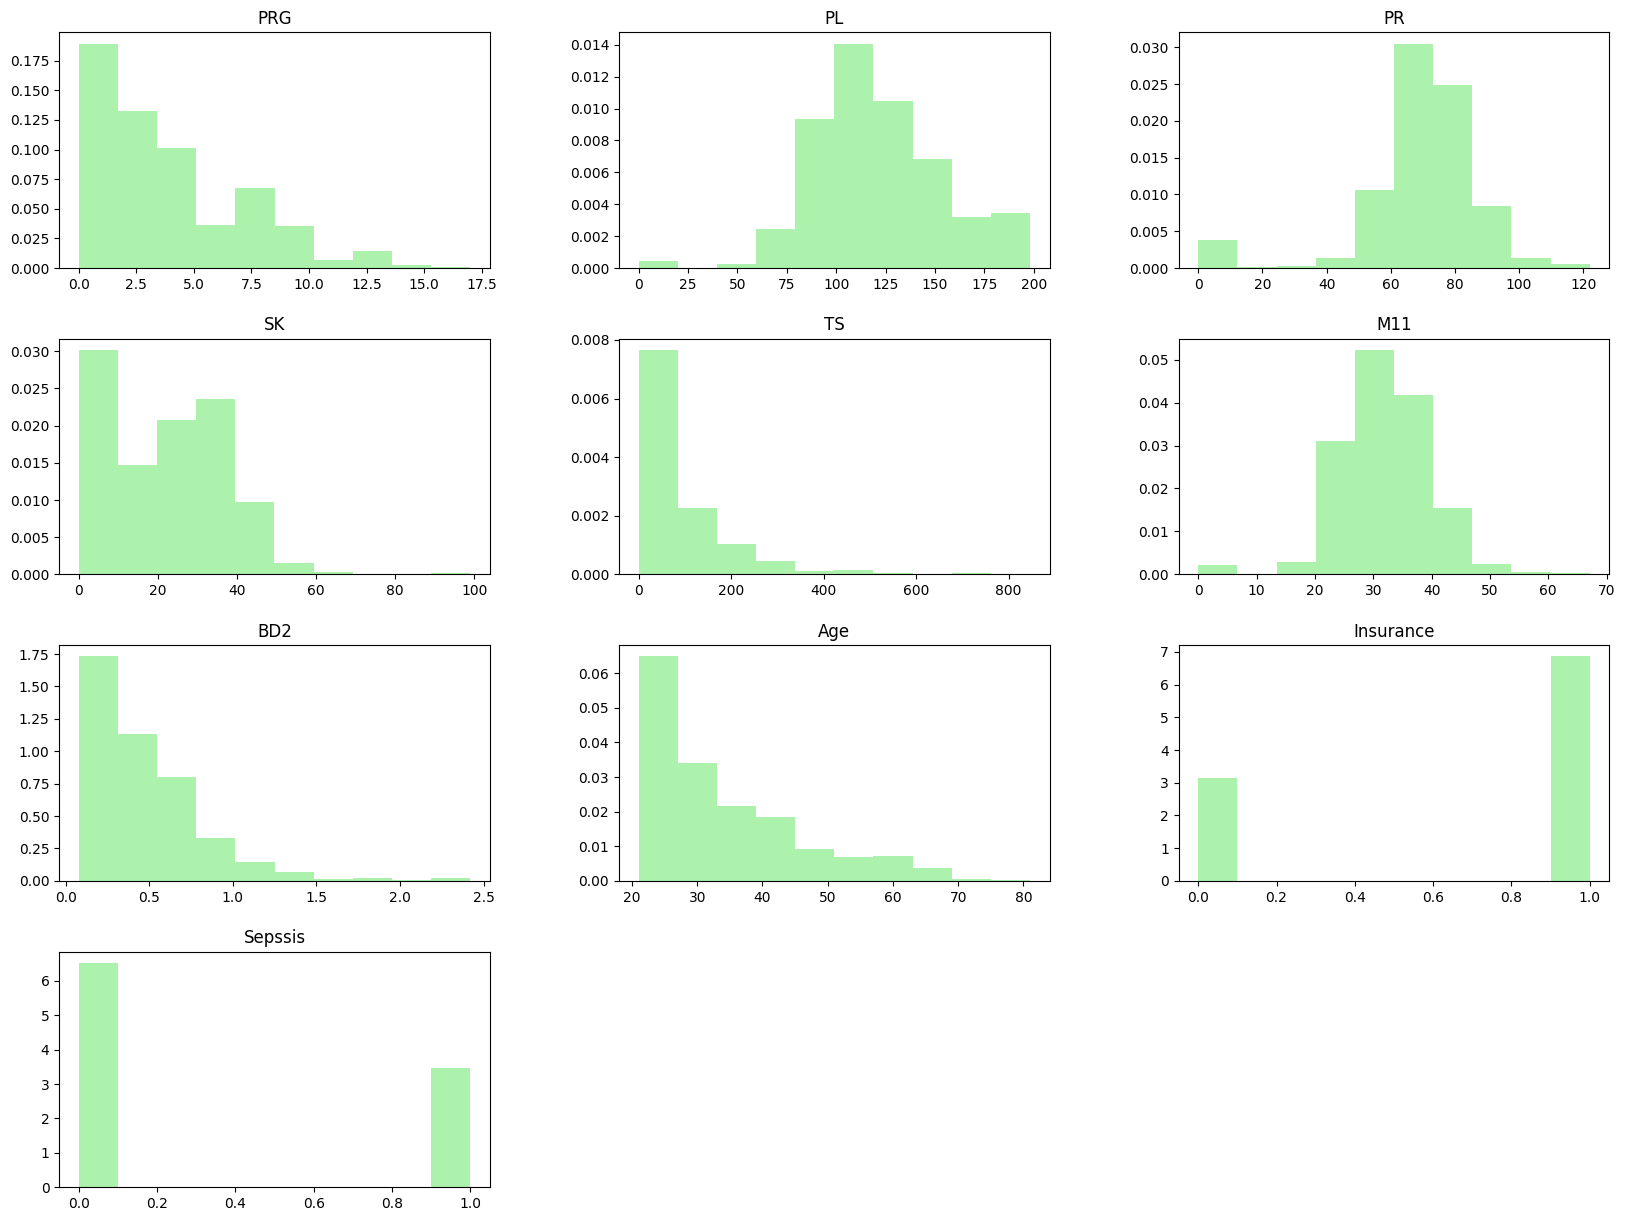

In [58]:

# Distribution of the variables
data.hist(density = True,figsize = (20, 15), facecolor = 'lightgreen', alpha = 0.75,grid = False)

plt.show()


#### OBSERVATION
- The Gender is evenly distributed 
- Over 50% of all contract types are month-on-month basis
- Electronic Check is the most used,covering 30% of all payment methods


In [65]:
import plotly.graph_objects as go

labels = ['Sepssis Negative','Sepssis Positive']
values = data.value_counts("Sepssis")

colors = ['mediumturquoise', 'lightgreen']

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[ 0, 0.2])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(title_text='Sepssis Pie Chart')
fig.show()

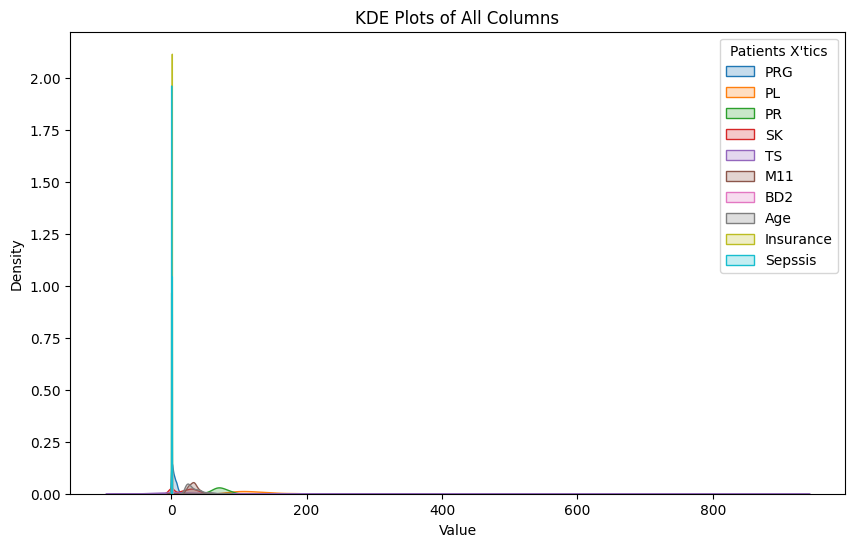

In [48]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Loop through each column in the DataFrame and create a KDE plot on the same graph
for column in data.columns:
    sns.kdeplot(data[column], shade=True, label=column)

# Add legend and labels
plt.legend(title="Patients X'tics")
plt.title('KDE Plots of All Columns')
plt.xlabel('Value')
plt.ylabel('Density')

# Show the plot
plt.show()

In [49]:
# Create an empty figure
fig = go.Figure()

# Loop through each column in the DataFrame and add a KDE plot to the figure
for column in data.columns:
    fig.add_trace(go.Violin(y=data[column], name=column, box_visible=True, meanline_visible=True))

# Update layout for better visualization
fig.update_layout(
    title='KDE Plots of All Columns',
    xaxis_title='Value',
    yaxis_title='Density',
    template='plotly_white'
)

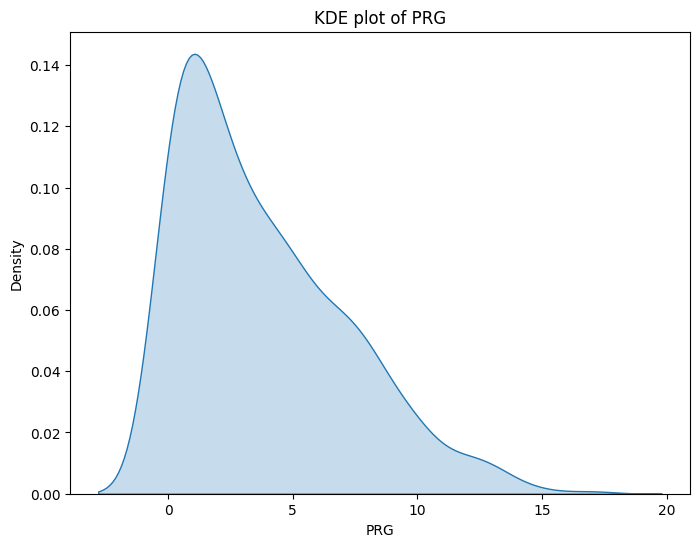

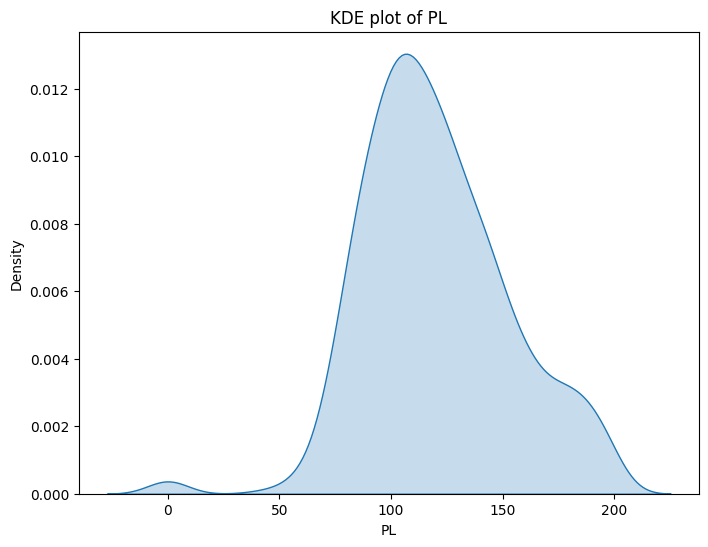

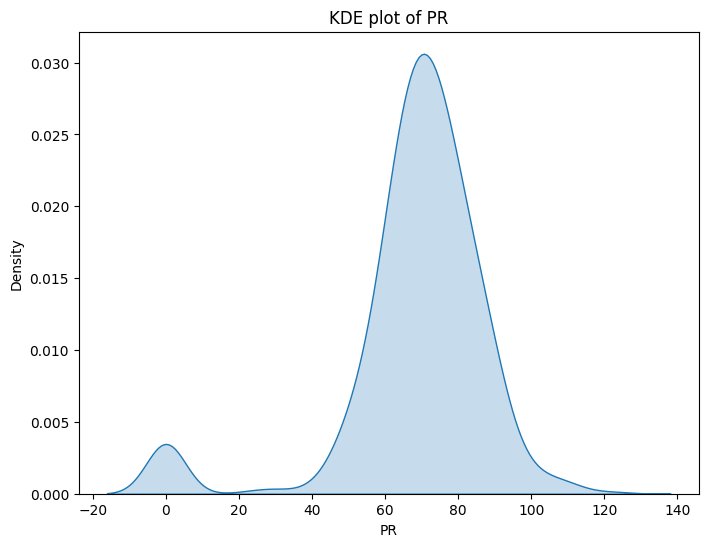

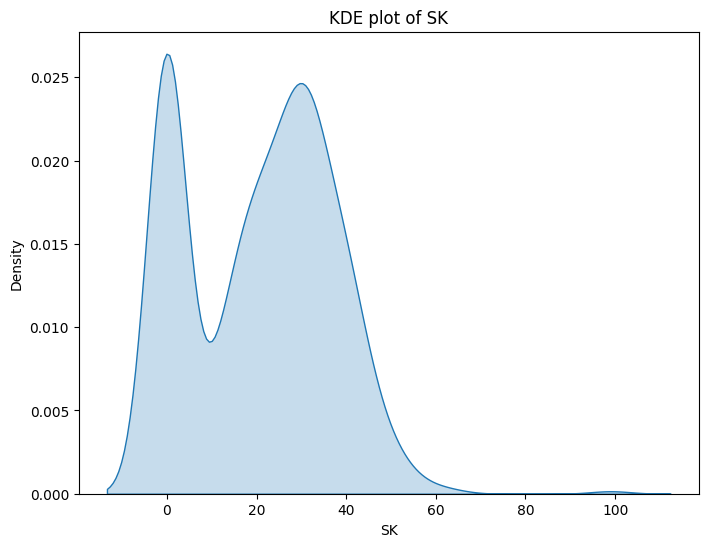

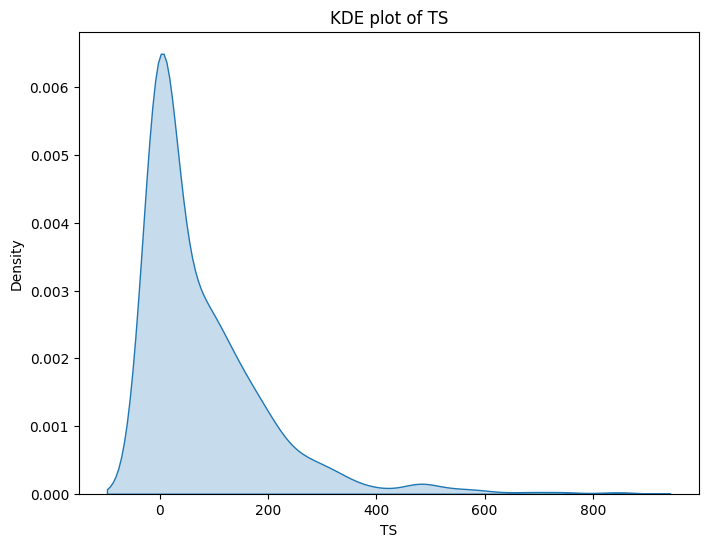

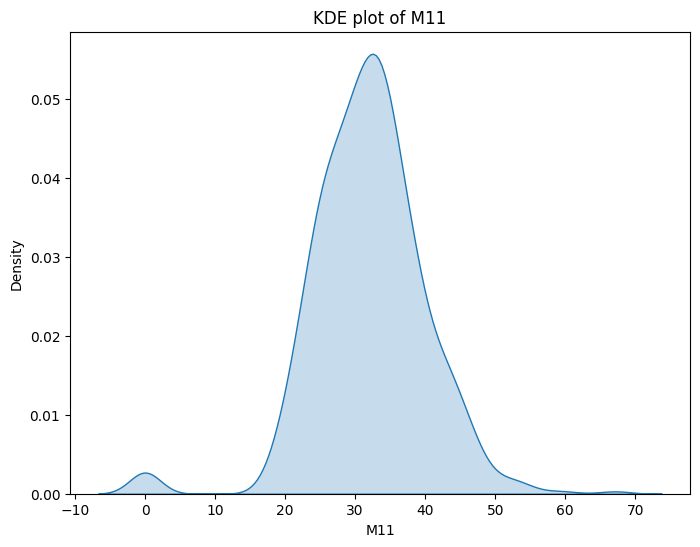

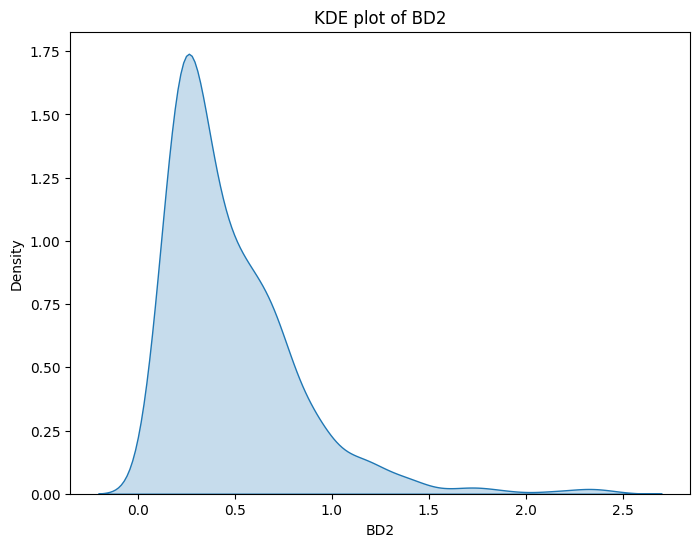

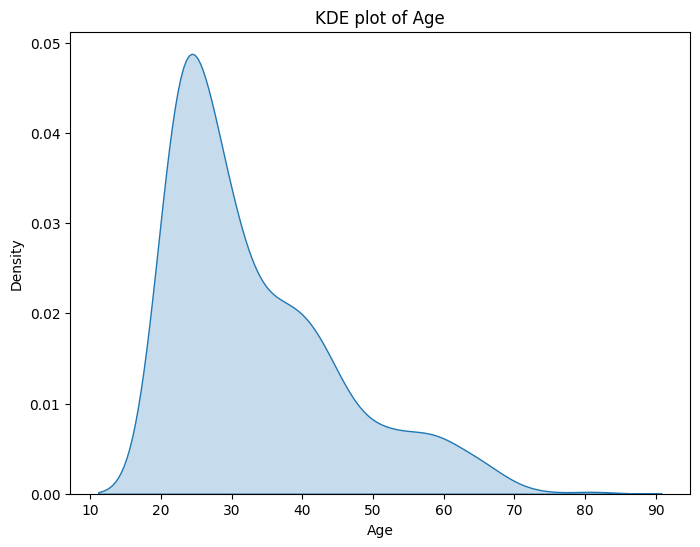

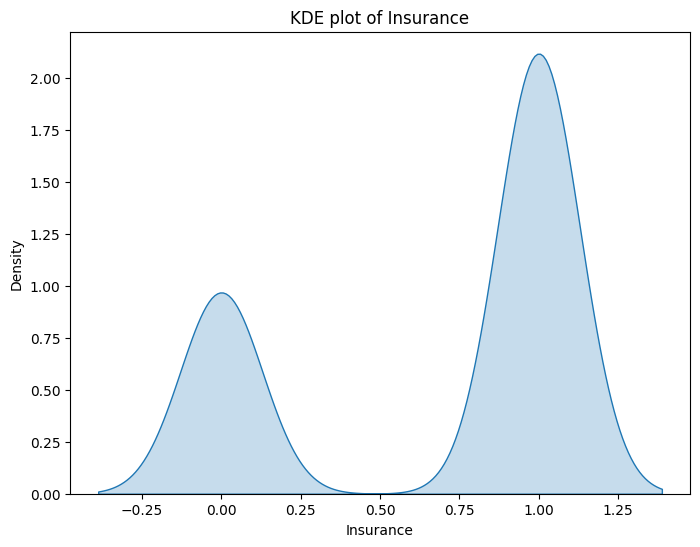

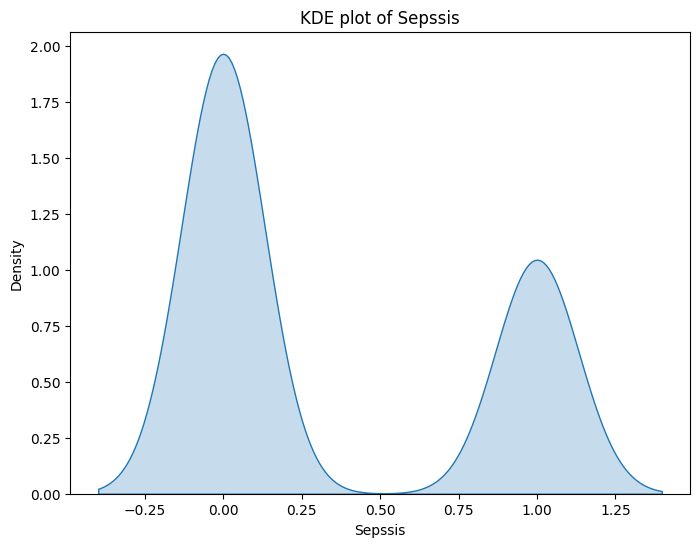

In [47]:
for column in data.columns:
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot
    sns.kdeplot(data[column], shade=True)
    plt.title(f'KDE plot of {column}')
    plt.xlabel(column)
    plt.show()  # Show the plot

### Bivariate Analysis

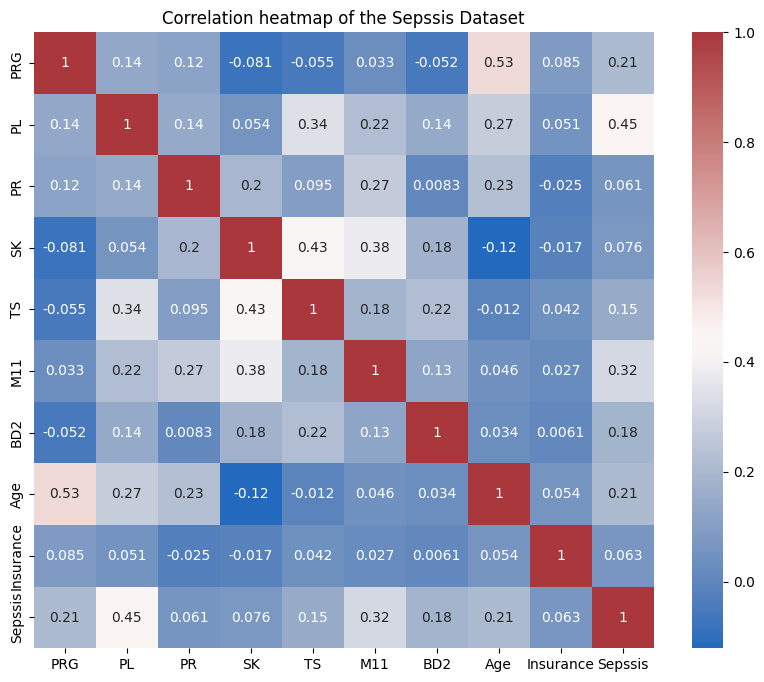

In [13]:

# Summarizing the relationships between the variables with a heatmap of the correlations
correlation_matrix = data.corr(numeric_only = True)
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True,cmap = 'vlag')
plt.title("Correlation heatmap of the Sepssis Dataset")
plt.show()

## `Answering the Analytical Questions`


##### `Are older patients more likely to have sepsis?(50 and above)`

In [51]:
fig = px.violin(data, y="Age", color="Sepssis",box = True,points='all',
                #violinmode='overlay', # draw violins on top of each other
                # default violinmode is 'group' as in example above
                hover_data=data.columns)
fig.show()

#### OBSERVATION
- More likely to get Sepssis between the ages of 30 and 60.
- Children and teenagers and young adults below 27 are less likely to be diagnosed.

##### `Are older patients with high plasma glucose likely to have sepsis?`


In [82]:
old_and_glucose = data.loc[(data['Age'] > 50) & (data['PRG'] > 5 )]


In [85]:
fig = px.histogram(old_and_glucose, x="Sepssis",  barmode='group', color ='Sepssis',
             height=400,title='Likelihood of older patients with high plasma glucose having sepsis')
fig.show()


#### OBSERVATION
- Still likely to have sepssis with high plasma glucose if you are above 50 years

#### ` Is Obesity with aging a risk factor for sepsis?`


In [98]:
#When BMI is greater than 30, a patient is obese
obese = data.loc[(data['M11'] > 29) & (data['Age'] > 35 )]
fig = px.histogram(obese, x="Sepssis",  barmode='group', color ='Sepssis',
             height=400,title='Likelihood of older patients with high plasma glucose having sepsis')
fig.show()

#### OBSERVATION
- An obese patient over 35 years old is likely to be diagnosed of Sepssis

#### `Is there a relation between bloodwork and sepsis?`

In [102]:

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=data['PL'],
    y=data['SK'],
    z=data['TS'],
    mode='markers',
    marker=dict(
        size=8,
        color=data['Sepssis'],  # Color by the Z column
        colorscale='Viridis',  # Choose a colorscale
        opacity=0.8
    )
)])

# Update layout for better visualization
fig.update_layout(
    title='Relationship between bloodworks(mu) and Sepssis',
    scene=dict(
        xaxis_title='Blood Result-1',
        yaxis_title='Blood Result-2',
        zaxis_title='Blood Result-3'
    ),
    legend=dict(
        orientation='h',  # horizontal legend
        x=0.4,  # adjust legend position
        y=1.1,
        bgcolor='rgba(255, 255, 255, 0.5)',  # semi-transparent legend background
        bordercolor='rgba(0, 0, 0, 0.5)',  # border color for the legend
        borderwidth=1  # border width for the legend
    )
)

# Show the interactive plot
fig.show()

#### OBSERVATION
Customers with both Online Security and Dependents are less likely to churn.


#### `Are patients with insurance more likely to detect sepsis?`

In [ ]:
# com_df.isnull().sum()

# #Dropping Empty rows
# com_df = com_df.dropna(subset=['OnlineSecurity','OnlineBackup','DeviceProtection','MultipleLines','TotalCharges','Churn'],axis = 0)


# #finding duplicates
# duplicate = com_df[com_df.duplicated()]
# duplicate.shape


In [ ]:
##### OBSERVATION 
# No duplicates found


In [ ]:
#### `HYPOTHESIS`

#Checking Normality of the data 

def check_normality(data,name):
    test_stat_normality, p_value_normality = stats.shapiro(data)
    print("p value:%.20f" % p_value_normality)
    if p_value_normality < 0.05:
        print(f"Reject null hypothesis >> The data for {name} is not normally distributed")
    else:
        print(f"Fail to reject null hypothesis >> The data for {name} is normally distributed")


In [ ]:

#Hypothesis

df_tech = com_df.loc[com_df.OnlineSecurity & com_df.DeviceProtection]
online = com_df.loc[com_df.OnlineSecurity]
device = com_df.loc[com_df.DeviceProtection]


#Normality Checks
check_normality(df_tech.TotalCharges,'Online Security and Device Protection')
check_normality(online.TotalCharges,'Online Security')
check_normality(device.TotalCharges,'Device Protection')


#Using the P-Levene to test the Hypothesis
stat, pvalue_levene = stats.levene(df_tech.TotalCharges, online.TotalCharges,device.TotalCharges )

print("p value:%.10f" % pvalue_levene)
if pvalue_levene < 0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")


##### Observation 
- Data samples are not normally distributed
- The variances of the samples are different
- Therefore a Non-Parametric test must be done (Kruskal Test)


In [ ]:
#Kruskal Test

stat, p = kruskal(df_tech.TotalCharges, online.TotalCharges,device.TotalCharges)
print('Statistics=%.3f, p=%.15f' % (stat, p))

if p > 0.05:
 print('All sample distributions are the same (fail to reject H0)')
else:
 print('One or more sample distributions are not equal distributions (reject null Hypothesis)')


In [ ]:
##### OBSERVATION
# Reject the null Hypothesis


In [ ]:
### `Data preparation`


In [ ]:
#### Feature Correlation and Selection

# Summarize the relationships between the variables with a heatmap of the correlations
correlation_matrix = df.corr(numeric_only= True).round(3)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot=True,cmap='vlag',mask=mask)
plt.title("Correlation heatmap of the dataset")
plt.show()


In [ ]:

df.head(1)
df1 = data.drop(columns=['index','customerID','gender','TotalCharges'],axis=1)

# Dropping row with null value
df1.dropna(axis = 0, inplace = True)


In [ ]:

def str_convert(df,column_name):
    df[column_name]=df[column_name].replace({1: 'Yes', 0: 'No'})

    return df



In [ ]:

df1 = str_convert(df1,'SeniorCitizen')


df1=df1.map(lambda x: 'Yes' if x == True else 'No' if x == False else x)


df1['tenure'] = pd.to_numeric(df1['tenure'], errors = 'coerce', downcast = 'integer')



In [ ]:

def cleaner (df):
    df = df.drop(columns=['customerID','gender','TotalCharges'],axis=1)
    df['SeniorCitizen']=df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})
    df=df.map(lambda x: 'Yes' if x == True else 'No' if x == False else x)
    df['tenure'] = pd.to_numeric(df['tenure'], errors = 'coerce', downcast = 'integer')

    return df


#### `Distribution of the dependent variable`

##### Dataset classification

- Checking to see if the binary dependent variables are evenly distributed or not 
- With the current levels of disparity between the two classes what stratification method will be best


In [ ]:

# Separate majority and minority classes
df1_stay = df1[df1.Churn== 'No']
df1_left = df1[df1.Churn=="Yes"]

print((len(df1_stay)/len(df1)),(len(df1_left)/len(df1)))
print(len(df1_left))


##### Observation
- About 70% of the customers stayed as compared to the customers that left therefore the churned customers represent the minority group
- Using undersampling means there will a huge loss of the majority class to balance the data
- Using oversampling means that there will  be a too many duplicates of the minority class in the balanced data 
- For this dataset, it will be best to use SMOTE to balance the dataset


In [ ]:

df1.dtypes


In [ ]:

df1.head(4)


#### `Modeling`


In [ ]:

df1.dtypes

# %%
# Dropping row with null value
df1.dropna(axis = 0, inplace = True)

# %%
X=df1.drop(columns=['Churn'],axis=1)
y=df1['Churn'].replace({'Yes': 1, 'No': 0})


# %%
# Looking at the descriptive statistics of the columns with categorical values
cats = [column for column in X.columns if (X[column].dtype == "O")]
print("Summary table of the Descriptive Statistics of Columns with Numeric Values")
df1[cats].describe(include="all")


In [ ]:

# %%
# Looking at the descriptive statistics of the columns with numeric values
numerics = [column for column in X.columns if (X[column].dtype != "O")]
print("Summary table of the Descriptive Statistics of Columns with Numeric Values")
df1[numerics].describe()


In [ ]:

# %%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 27)


In [ ]:

# %%
y_train_encoded = pd.to_numeric(y_train)
y_test_encoded = pd.to_numeric(y_test)



In [ ]:
##### `Making pipelines`


In [ ]:

scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# putting numeric columns to scaler and categorical to encoder
num_transformer = Pipeline(steps = [
     ('num_imputer', SimpleImputer(strategy = 'median')),
    ('num', scaler)
])
cat_transformer = Pipeline(steps = [
   ('cat_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('cat', encoder)
])


In [ ]:

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers = [('num', num_transformer , numerics),
                    ('cat', cat_transformer , cats),
     
                    ])


In [ ]:

#Calling the models of interest

log_mod =  (LogisticRegression(random_state = 27 ))
svc_mod = SVC(random_state=27,probability= True)

catboost_mod = (CatBoostClassifier(random_state=27, verbose = False))
xgboost_mod = XGBClassifier(random_state=27)
 


In [ ]:

# Create a dictionary of the model pipelines
all_models_pipelines = {"Logistic_Regressor": (LogisticRegression(random_state = 27 )),
              "SVM": SVC(random_state = 27,probability = True),
              "CatBoost": (CatBoostClassifier(random_state=27, verbose = False)),
              "Xgboost":XGBClassifier(random_state=27)
              }
    


In [ ]:

# Create a function to model and return comparative model evaluation scores,perform the SMOTE on each model pipeline,to calculate and compare accuracy

def evaluate_models(model_pipelines = all_models_pipelines, X_test = X_test, y_test = y_test_encoded):


    # Dictionary for trained models
    trained_models = dict()

    # Create a dataframe matrix to all pipelines
    all_confusion_matrix = []
    
    
    # List to receive scores
    performances = []
    for name, model_pipeline in model_pipelines.items():
        final_pipeline = imbpipeline(steps=[("preprocessor", preprocessor), 
                                   ('smote-sampler',SMOTE(random_state = 0)),
                                   ("feature_selection",SelectKBest(mutual_info_classif, k = 'all')),
                           ("model", model_pipeline)])
    


        
        final_pipeline.fit(X_train,  y_train)
       

        # Predict and calculate performance scores
        y_pred = final_pipeline.predict(X_test)
        performances.append([name,
                             accuracy_score(y_test, y_pred),  # accuracy
                             precision_score(y_test, y_pred, average="weighted"),  # precisions
                             recall_score(y_test, y_pred,average="weighted"),  # recall
                             f1_score(y_test, y_pred, average="weighted")
                             ])

        # Print classification report
        model_pipeline_report = classification_report(y_test, y_pred)
        print("This is the classification report of the",name, "model", "\n", model_pipeline_report, "\n")

        # Defining the Confusion Matrix
        model_pipeline_conf_mat = confusion_matrix(y_test, y_pred)
        model_pipeline_conf_mat = pd.DataFrame(model_pipeline_conf_mat).reset_index(drop = True)
        print(f"Below is the confusion matrix for the {name} model")

        # Visualizing the Confusion Matrix
        f, ax = plt.subplots()
        sns.heatmap(model_pipeline_conf_mat, annot = True, linewidth = 1.0,fmt = ".0f", cmap = "RdPu", ax=ax)
        plt.xlabel = ("Prediction")
        plt.ylabel = ("Actual")
        plt.show()

        # Store trained model
        trained_model_name = "trained_" + str(name).lower()
        trained_models[trained_model_name] = final_pipeline
        
        print("\n", "-----   -----"*6, "\n",  "-----   -----"*6)
    
    # Compile accuracy
    df_compare = pd.DataFrame(performances, columns = ["model", "accuracy", "precision", "recall", "f1_score"])
    df_compare.set_index("model", inplace = True)
    df_compare.sort_values(by = ["f1_score", "accuracy"], ascending = False, inplace=True)
    return df_compare, trained_models


In [ ]:

# Run the function to train models and return performances
all_models_eval, trained_models = evaluate_models()
all_models_eval


In [ ]:

# #### `Visualizing Evaluation Using ROC - AUC`


In [ ]:

from sklearn.metrics import roc_curve,auc

all_roc_data = {}
fig, ax = plt.subplots()

for name,model in trained_models.items():
    y_score = model.predict_proba(X_test)[:,1]
    
    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_score)

    roc_auc = auc(fpr,tpr)
    roc_data_df = pd.DataFrame({'False Positive Rate' : fpr , 'True Positve Rate' : tpr , 'Threshold' : thresholds})
    all_roc_data[name] = roc_data_df

    ax.plot(fpr,tpr, label = f'{name} (AUC = {roc_auc: .2f})')

    ax.plot([0,1],[0,1], linestyle='--', color='k', label='Random')
    ax.set_ylabel('False Positive Rate')
    ax.set_xlabel('True Positive Rate')
    ax.set_title('ROC Curve for all pipelines')

plt.legend()
plt.show()



In [ ]:


lr_roc_data = all_roc_data["trained_logistic_regressor"]
svm_roc_data = all_roc_data["trained_svm"]
catboost_roc_data = all_roc_data["trained_catboost"]
xgboost_roc_data = all_roc_data["trained_xgboost"]



##### `Business Impact Assessment`

- The true positive rate is sensitive but there is a need to raise its sensitivity higher for production
- The acceptable threshold to meet the criteria is 0.4812 for the Logistic Regression model
- The acceptable threshold to meet the criteria is 0.3703 for the SVM model
- The acceptable threshold to meet the criteria is 0.2398 for the Cat Boost model
- The acceptable threshold to meet the criteria is 0.2189 for the Xgboost model


#### `Hyperparameter Tuning`


In [ ]:
## XGBoost Classifier
xgb_clf = Pipeline(steps=[("preprocessor", preprocessor), 
                          ("model", XGBClassifier(random_state=27))])

# Defining the values for the RandomizedSearchCV
param_grid_xgboost = {"model__learning_rate": [0.1, 0.3, 0.5, 0.7, 1.0],
               "model__max_depth": [5, 10, 15, 20, 25, 30, 35],
               "model__booster": ["gbtree", "gblinear", "dart"],
               "model__n_estimators":  list(range(2, 11, 2))
              }


In [ ]:

# Running the RandomizedSearch Cross-Validation with the above set of Parameters
grid_search_model = GridSearchCV(estimator = xgb_clf, param_grid = param_grid_xgboost, n_jobs=-1, scoring = "accuracy")


# Fitting the model to the training data
grid_search_model.fit(X_train,y_train_encoded)

print("Best parameter (CV score=%0.5f):" % grid_search_model.best_score_)
print(f"The best parameters for the GSCV XGB are: {grid_search_model.best_params_}")


In [ ]:

# Looking at the best combination of hyperparameters for the model
best_gs_params = grid_search_model.best_params_
print("The best combination of hyperparameters for the model will be:")
for param_name in sorted(best_gs_params.keys()):
    print(f"{param_name} : {best_gs_params[param_name]}")


In [ ]:

# Defining the best version of the model with the best parameters
best_gs_model = Pipeline(steps=[("preprocessor", preprocessor), 
                          ("model",XGBClassifier(random_state=27,
                              booster="gblinear",
                              learning_rate=1.0,
                              
                              n_estimators=6
                              ))])


In [ ]:

# Fit the model to the training data
best_gs_model.fit(X_train, y_train_encoded)

# Predict on the test data
best_gs_pred = best_gs_model.predict(X_test)

print(best_gs_pred)

# Confusion Matrix
best_gs_conf_mat = (pd.DataFrame(confusion_matrix(y_test_encoded, best_gs_pred)).reset_index(drop=True))

# Visualizing the Confusion Matrix
f, ax = plt.subplots()
sns.heatmap(best_gs_conf_mat, annot=True, linewidth=1.0, fmt=".0f", cmap="RdPu", ax=ax)


In [ ]:

logistic_model = LogisticRegression(random_state=27)
logistic_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", logistic_model)])

# Define the parameter distributions for RandomizedSearchCV
param_distributions = {
        'model__penalty': ['l2'],
    'model__solver' : ['lbfgs', 'liblinear', 'newton-cg'],
    'model__max_iter' : [500,700,1000]
}

# Create the RandomizedSearchCV object
clf = GridSearchCV(logistic_pipeline, param_grid=param_distributions, scoring = 'accuracy',error_score='raise')

# Fit the RandomizedSearchCV on your training data
search_model = clf.fit(X_train, y_train_encoded)

print("Best parameter (CV score=%0.5f):" % search_model.best_score_)
print(f"The best parameters for the GSCV XGB are: {search_model.best_params_}")



In [ ]:

# Predict on the test data
search_pred = search_model.predict(X_test)

# # Get the best hyperparameters
# best_params = search.best_params_

# print(best_params)
# Defining the best version of the model with the best parameters
best_search_model = Pipeline(steps=[("preprocessor", preprocessor), 
                          ("model",LogisticRegression(random_state=27,
                              max_iter=500,
                              penalty='l2',
                              solver = 'newton-cg',
                              verbose=0
                              ))])

# Fit the model to the training data
best_search_model.fit(X_train, y_train_encoded)

# Predict on the test data
best_search_pred = best_gs_model.predict(X_test)

print(best_search_pred)


In [ ]:

# Confusion Matrix
best_search_conf_mat = (pd.DataFrame(confusion_matrix(y_test_encoded, best_search_pred)).reset_index(drop=True))

# Visualizing the Confusion Matrix
f, ax = plt.subplots()
sns.heatmap(best_search_conf_mat, annot=True, linewidth=1.0, fmt=".0f", cmap="RdPu", ax=ax)


In [ ]:

cat_model = (CatBoostClassifier(random_state=27))
cat_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", cat_model)])

# Define the parameter distributions for RandomizedSearchCV
param_distributions = {
    #'model__C': uniform(scale=4),
    'model__depth': [6],                   # Depth of the trees
    'model__learning_rate': [0.1,1],          # Learning rate of the model
    'model__l2_leaf_reg': [3],              # L2 regularization term on weights
    'model__rsm': [0.2,0.8],                   # Random Selection Rate (regularization by introducing randomness)
    'model__iterations': [500,800],            # Number of boosting iterations
    'model__loss_function': ['MultiClass'], # Loss function for multi-class classification
    'model__eval_metric': ['Accuracy'],    # Evaluation metric

}

# Create the RandomizedSearchCV object
cat_clf = GridSearchCV(cat_pipeline, param_grid=param_distributions, scoring = 'accuracy',error_score='raise')

# Fit the RandomizedSearchCV on your training data
cat_gs_model = cat_clf.fit(X_train, y_train_encoded)

print("Best parameter (CV score=%0.5f):" % cat_gs_model.best_score_)
print(f"The best parameters for the GSCV XGB are: {cat_gs_model.best_params_}")



In [ ]:

# Predict on the test data
cat_gs__pred = search_model.predict(X_test)

# # Get the best hyperparameters
# best_params = search.best_params_

# print(best_params)
# Defining the best version of the model with the best parameters
best_gs_catboost_model = Pipeline(steps=[("preprocessor", preprocessor), 
                          ("model",CatBoostClassifier(random_state=27,
                              iterations=500,
                              depth=6,
                              eval_metric = 'Accuracy',
                              l2_leaf_reg=3,
                              learning_rate=0.1,
                              rsm = 0.8,
                              loss_function = 'MultiClass',
                              

                              ))])

# Fit the model to the training data
best_gs_catboost_model.fit(X_train, y_train_encoded)

# Predict on the test data
best_catboost_pred = best_gs_catboost_model.predict(X_test)

print(best_catboost_pred)


In [ ]:

# Confusion Matrix
best_search_conf_mat = (pd.DataFrame(confusion_matrix(y_test_encoded, best_catboost_pred)).reset_index(drop=True))

# Visualizing the Confusion Matrix
f, ax = plt.subplots()
sns.heatmap(best_search_conf_mat, annot=True, linewidth=1.0, fmt=".0f", cmap="RdPu", ax=ax)



In [ ]:

svc_model = SVC(random_state=27)
svc_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", svc_model)])

# Define the parameter distributions for GridSearchCV
param_distributions = {
    
    'model__break_ties': [True],                   
    'model__kernel': ['linear','rbf','poly'],         
    'model__max_iter': [-1],              
    'model__coef0': [0.0,0.2],                
    'model__probability': [True ],           
    'model__shrinking': [True,False], 
    'model__verbose': [True],    
    'model__tol' : [0.0001,0.1]
}

# Create the GridSearchCV object
svc_clf = GridSearchCV(svc_pipeline, param_grid=param_distributions, scoring = 'accuracy',error_score='raise')

# Fit the GridSearchCV on your training data
svc_gs_model = svc_clf.fit(X_train, y_train_encoded)

print("Best parameter (CV score=%0.5f):" % svc_gs_model.best_score_)
print(f"\nThe best parameters for the GSCV XGB are: {svc_gs_model.best_params_}")



In [ ]:

# Defining the best version of the model with the best parameters
best_gs_svc_model = Pipeline(steps=[("preprocessor", preprocessor), 
                          ("model",SVC(random_state=27,
                              break_ties=True,
                              coef0 = 0,
                              kernel = 'linear',
                              probability = True,
                              max_iter =-1,
                              shrinking = True,                                                      
                              ))])

# Fit the model to the training data
best_gs_svc_model.fit(X_train, y_train_encoded)

# Predict on the test data
best_svc_pred = best_gs_svc_model.predict(X_test)

print(best_svc_pred)


In [ ]:

# Confusion Matrix
best_svc_conf_mat = (pd.DataFrame(confusion_matrix(y_test_encoded, best_svc_pred)).reset_index(drop=True))

# Visualizing the Confusion Matrix
f, ax = plt.subplots()
sns.heatmap(best_search_conf_mat, annot=True, linewidth=1.0, fmt=".0f", cmap="RdPu", ax=ax)


#### `Testing one of the models with the test data set`

In [ ]:

test_data = pd.read_excel('data\\Telco-churn-last-2000.xlsx')
test_data = cleaner(test_data)
best_svc_pred = best_gs_svc_model.predict(test_data)

print(best_svc_pred)


#### `Persit the model`

In [ ]:
for name, model_pipeline in all_models_pipelines.items():
    joblib.dump(model_pipeline,f'models\{name}.joblib')

In [ ]:
joblib.dump(best_gs_pred ,'models\\tuned\\best_gs_pred .joblib')

